In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

In [3]:
# Load the shapefile and read data
gdf = gpd.read_file("PH_Adm1_Regions.shp")
df = pd.read_csv("Hazardous Waste by Region and by Type, 2012 to 2022.csv")

print(gdf)

# Drop unnecessary columns
gdf = gdf[["adm1_en", "geometry"]]

     adm1_psgc                                            adm1_en geo_level  \
0    100000000                           Region I (Ilocos Region)       Reg   
1    200000000                         Region II (Cagayan Valley)       Reg   
2    300000000                         Region III (Central Luzon)       Reg   
3    400000000                           Region IV-A (CALABARZON)       Reg   
4    500000000                            Region V (Bicol Region)       Reg   
5    600000000                        Region VI (Western Visayas)       Reg   
6    700000000                       Region VII (Central Visayas)       Reg   
7    800000000                      Region VIII (Eastern Visayas)       Reg   
8    900000000                    Region IX (Zamboanga Peninsula)       Reg   
9   1000000000                       Region X (Northern Mindanao)       Reg   
10  1100000000                           Region XI (Davao Region)       Reg   
11  1200000000                          Region XII (

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)
compiled = pd.Series(df.select_dtypes(include=[np.number]).values.ravel())
compiled.describe()

count       187.00
mean     141956.82
std      523187.22
min           0.00
25%         362.01
50%        2998.08
75%       48615.75
max     5943932.49
dtype: float64

In [5]:
# Merging data - Generated Waste By Region Per Year (2012 to 2022)
gdf = pd.merge(
    left=gdf,
    right=df,
)

# Merging data - Generated Waste By Region Accumulated In Years (2012 to 2022)
# for year in range(2013, 2023):
#     df[str(year)] = df[str(year-1)] + df[str(year)]
# gdf = pd.merge(
#     left=gdf,
#     right=df,
# )

gdf

,adm1_en,geometry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Region I (Ilocos Region),"MULTIPOLYGON (((285928.399 2055561.259, 285954...",4374.63,0.00,1467.93,2030.48,1691.13,4378.35,4905.67,3704.25,892.08,2859.79,2874.98
1,Region II (Cagayan Valley),"MULTIPOLYGON (((390824.572 2333905.124, 390822...",279.20,73.82,51.61,0.00,10.25,109.97,156.30,944.61,58.78,1265.86,1670.46
2,Region III (Central Luzon),"MULTIPOLYGON (((418263.080 1822987.298, 418262...",279848.18,1809183.89,0.00,1344076.60,626366.99,246407.70,331613.98,49065.38,14288.58,54032.95,48166.12
3,Region IV-A (CALABARZON),"MULTIPOLYGON (((425287.448 1559120.357, 425305...",282846.18,5943932.49,273669.50,976186.65,118569.78,278059.85,106116.86,1171473.12,31709.44,117083.09,127486.15
4,Region V (Bicol Region),"MULTIPOLYGON (((498716.968 1296785.638, 498718...",41127.70,0.00,639622.88,8637.65,26656.01,23197.66,498.43,10565.65,613.95,2921.80,2816.47
5,Region VI (Western Visayas),"MULTIPOLYGON (((329645.838 1349922.968, 329647...",0.00,299290.69,1299.29,1950.38,1133.76,3643.43,3773.78,2998.08,399.34,2299.21,3852.46
6,Region VII (Central Visayas),"MULTIPOLYGON (((619199.941 1274054.134, 619188...",0.00,0.00,451877.11,278022.55,383674.06,18069.68,51016.18,191328.01,3017.31,12718.34,12432.67
7,Region VIII (Eastern Visayas),"MULTIPOLYGON (((648513.417 1403953.256, 648510...",0.00,0.00,508.64,10674.41,20777.07,24044.80,10892.73,129992.52,42.88,938.15,1087.50
8,Region IX (Zamboanga Peninsula),"MULTIPOLYGON (((545396.693 978665.920, 545381....",978.56,8073.58,688.46,527.33,23217.20,3384.50,2069.54,1391.26,26.57,242.38,540.07
9,Region X (Northern Mindanao),"MULTIPOLYGON (((686608.730 1023695.375, 686614...",0.00,1983.11,786482.29,871931.94,0.00,9603.50,14309.28,18989.13,3227.68,10764.48,11147.49


In [6]:
# Define the intervals and their corresponding colors
regions_label = ['Region I', 'Region II', 'Region III', 'Region IV-A', 'Region V', 'Region VI', 'Region VII', 'Region VIII', 'Region IX', 'Region X', 'Region XI', 'Region XII', 'NCR', 'CAR', 'Region XIII', 'MIMAROPA', 'BARMM']
intervals = [0, 362, 2998, 48686, 100000, 3000000, 5943932]

def colorize(val):
    if val < 362:
        return "#fff9bf"
    elif val < 2998:
        return "#fee590"
    elif val < 48686:
        return "#fec560"
    elif val < 100000:
        return "#fc883b"
    elif val < 3000000:
        return "#eb2a20"
    else:
        return "#a30026"

# def colorize(val): # For main visual
#     if val < 362:
#         return "#532564"
#     elif val < 2998:
#         return "#883070"
#     elif val < 48686:
#         return "#C34167"
#     elif val < 100000:
#         return "#DD5A5B"
#     elif val < 3000000:
#         return "#fc883b"
#     else:
#         return "#ECA67A"

def colorized_list(values):
    return [colorize(val) for val in values]


linear
linear


IndexError: list index out of range

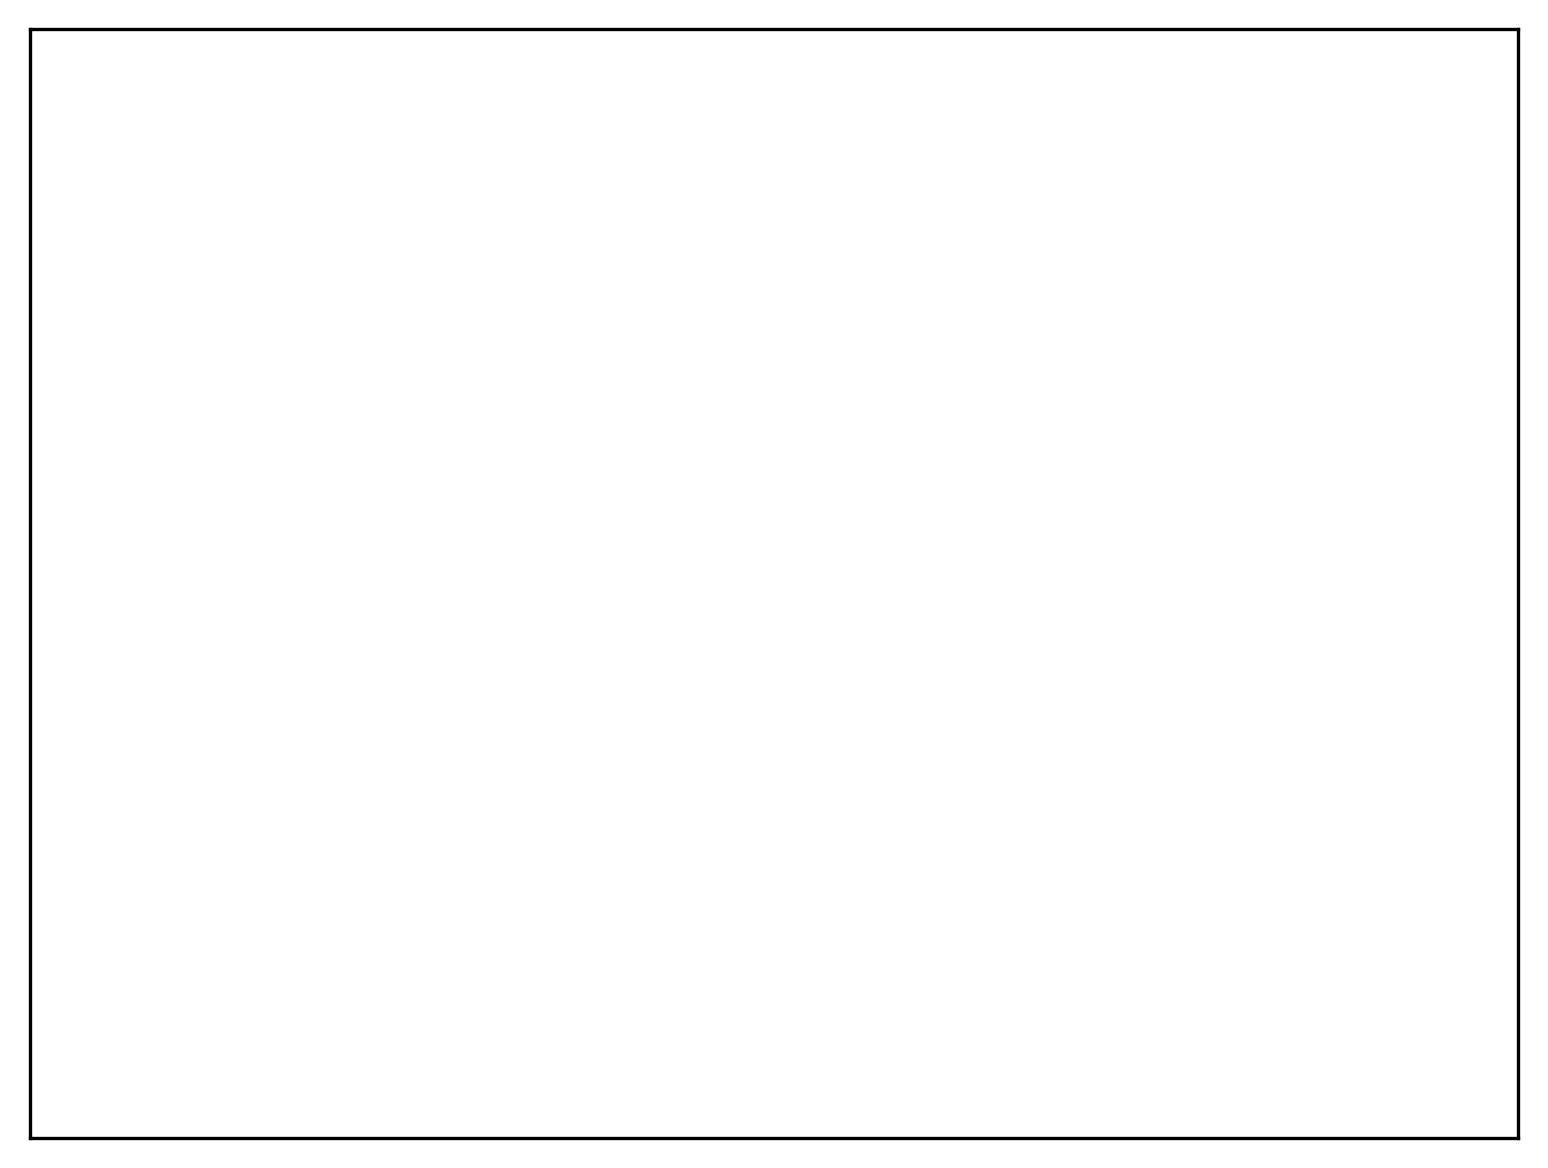

In [9]:
# Remove unnecessary lines
fig, ax = plt.subplots(dpi=300)
# ax.set_facecolor('#1b181c')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
print(ax.get_xscale())
print(ax.get_yscale())
x_data = ax.get_lines()[0].get_xdata()
y_data = ax.get_lines()[0].get_ydata()
print("Minimum X value:", min(x_data))
print("Maximum X value:", max(x_data))
print("Minimum Y value:", min(y_data))
print("Maximum Y value:", max(y_data))
for edge in ["right", "bottom", "top", "left"]:
    ax.spines[edge].set_visible(False)

year = "2013"
color = "#12372A" # Green

# Plot the shapefile

# Outline Each Region
for idx, row in gdf.iterrows():
    gpd.GeoSeries(row['geometry']).boundary.plot(ax=ax, linewidth=0.2, edgecolor=color)

# Label Each Region
plt.text(0.8, 0.57, f"I", color=color, transform=ax.transAxes, fontsize=8, weight='bold')
# plt.text(0.5, 0.65, f"II", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.67, f"III", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.69, f"IV", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.72, f"V", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"VI", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"VII", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"VIII", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"IX", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"X", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"XI", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"XII", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"NCR", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"CAR", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"XIII", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"MIMAROPA", color=color, transform=ax.transAxes, fontsize=4, weight='bold')
# plt.text(0.5, 0.65, f"BARMM", color=color, transform=ax.transAxes, fontsize=4, weight='bold')

# Title
ax.text(0.59, 0.95, f"Hazardous Waste Generated By Region ({year})", transform=ax.transAxes, color=color, weight='bold', ha='center', va='center')


# Region Data Text
region_data_year = copy.deepcopy(gdf[year]).values.ravel()

plt.text(-0.5, 0.8, f"Region Wastes (Tons)", color=color, weight='bold', transform=ax.transAxes)
index = 0
max_waste = max(region_data_year)
for i, region_data in enumerate(region_data_year[::-1]):
    if region_data == max_waste: index = i
    plt.text(
        -0.5,
        0.14 + (i / 25),
        f"{regions_label[::-1][i]} - {region_data}",
        ha="left",
        va="top",
        color=colorize(region_data),
        transform=ax.transAxes,
    )


# Region with most produced waste
plt.text(1.05, 0.80, 'Most Produced Waste', transform=ax.transAxes, fontsize=10, color=color, weight='bold', va="top", ha="left")
plt.text(1.05, 0.75, regions_label[::-1][index], transform=ax.transAxes, fontsize=10, color=colorize(max_waste), weight='bold', va="top", ha="left")


# Information Color Text
plt.text(1.05, 0.60, f"Waste Color Intensity", color=color, weight='bold', transform=ax.transAxes)
plt.text(1.05, 0.55, f"0 < 362", color=colorize(0), transform=ax.transAxes)
plt.text(1.05, 0.50, f"362 < 2998", color=colorize(362), transform=ax.transAxes)
plt.text(1.05, 0.45, f"2998 < 48686", color=colorize(2998), transform=ax.transAxes)
plt.text(1.05, 0.40, f"48686 < 100000", color=colorize(48686), transform=ax.transAxes)
plt.text(1.05, 0.35, f"100000 < 3000000", color=colorize(100000), transform=ax.transAxes)
plt.text(1.05, 0.30, f"3000000 < 5943932", color=colorize(3000000), transform=ax.transAxes)

gdf.plot(
    ax=ax,
    color=colorized_list(copy.deepcopy(gdf[year]).values.ravel()),
    legend=True,
)
    
plt.show()